<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
#pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

In [96]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


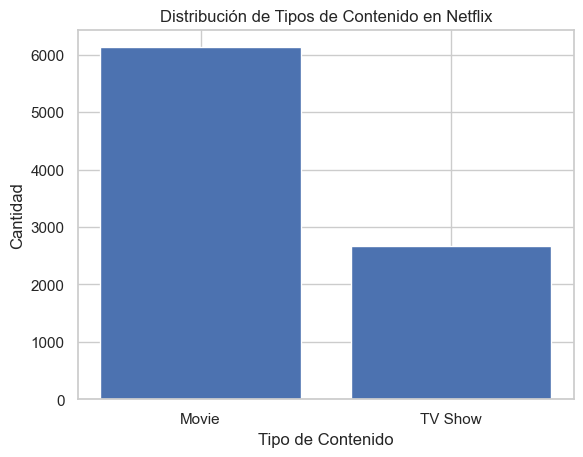

In [5]:
tipo_contenido = df["type"].value_counts()

plt.bar(tipo_contenido.index, tipo_contenido.tolist())

plt.title("Distribución de Tipos de Contenido en Netflix")
plt.xlabel("Tipo de Contenido")
plt.ylabel("Cantidad")

plt.show()

El tipo de contenido predominante en Netflix son las peliculas. Esto refleja que existe una preferencia marcada por parte de los usuarios hacia este formato, lo cual podría implicar una mayor oferta de películas en el futuro, ya que la plataforma tenderá a reforzar aquello que concentra la demanda.

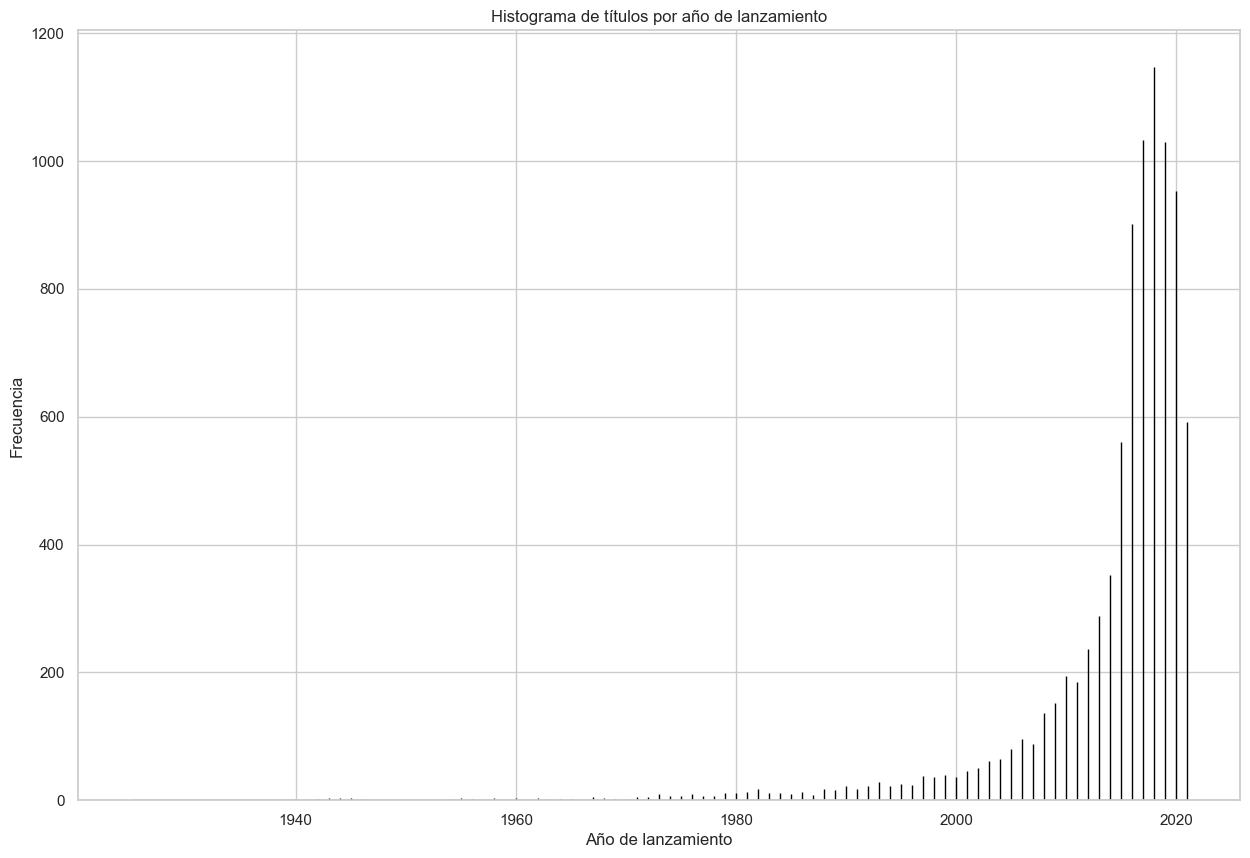

In [6]:
plt.figure(figsize=(15, 10))

years = df["release_year"]

plt.hist(years, bins=len(years), edgecolor="black", color="green")

# etiquetas y título
plt.xlabel("Año de lanzamiento")
plt.ylabel("Frecuencia")
plt.title("Histograma de títulos por año de lanzamiento")

plt.show()

El histograma muestra que la gran mayoría del contenido disponible en Netflix corresponde a producciones recientes, especialmente desde los años 2000 en adelante, con un crecimiento muy marcado alrededor del 2010 y una presencia mínima de títulos anteriores a 1980.
Esto indica que la plataforma concentra su catálogo en obras contemporaneas.

In [10]:
df["rating"].fillna("").value_counts

<bound method IndexOpsMixin.value_counts of 0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object>

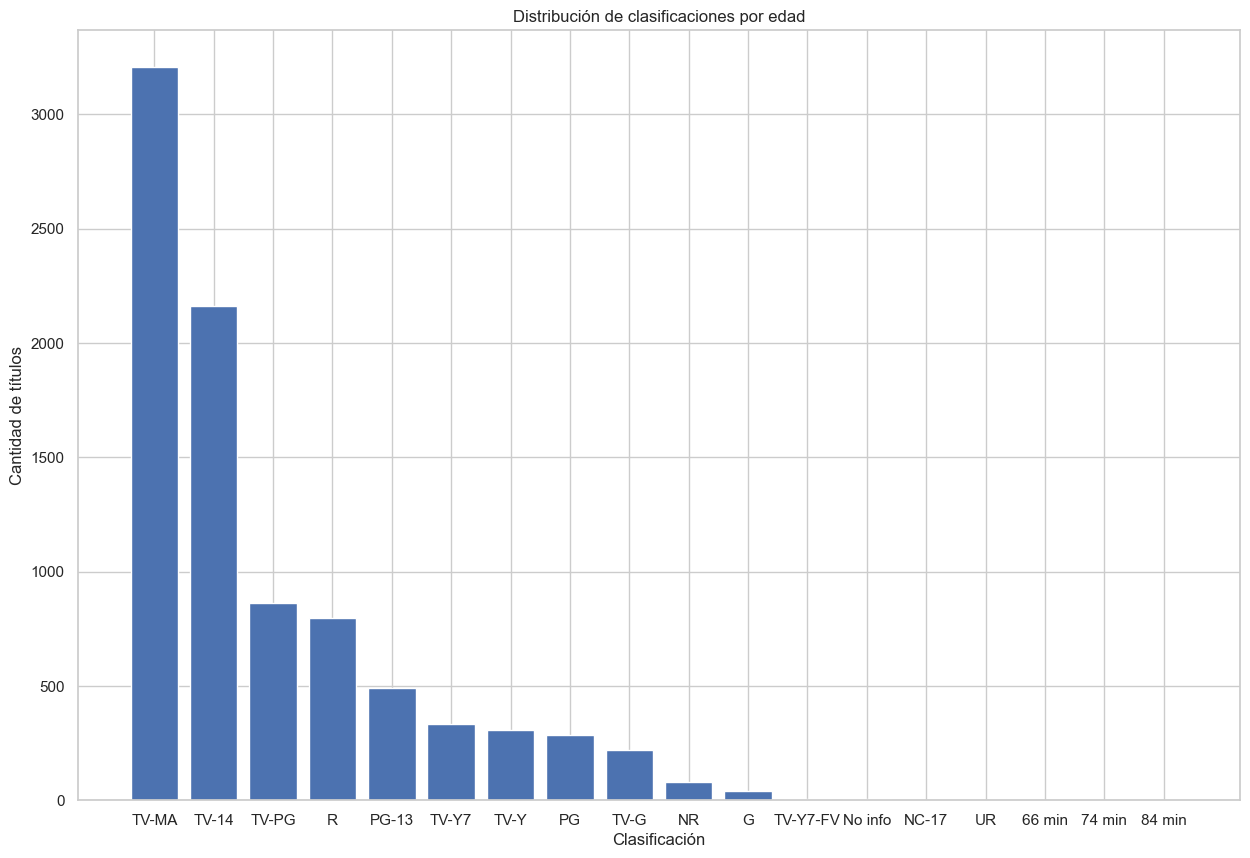

Clasificación más común: TV-MA


In [ ]:
plt.figure(figsize=(15, 10))

x = df["rating"].fillna("No info").value_counts().index
y = df["rating"].fillna("No info").value_counts().values

plt.bar(x, y)

# etiquetas y titulo
plt.xlabel("Clasificación")
plt.ylabel("Cantidad de títulos")
plt.title("Distribución de clasificaciones por edad")

plt.show()

Las etiquetas más repetidas son TV-MA (contenido para adultos con violencia, lenguaje fuerte o temáticas explícitas) y TV-14 (recomendado para mayores de 14 años, con algunas escenas que pueden no ser aptas para menores). El hecho de que estas clasificaciones dominen el catalogo indica que Netflix está más enfocado en un público adulto, ofreciendo principalmente series y películas con temáticas maduras.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


C:\Users\diego\AppData\Local\Temp\ipykernel_11552\2468126882.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df["date_added"])


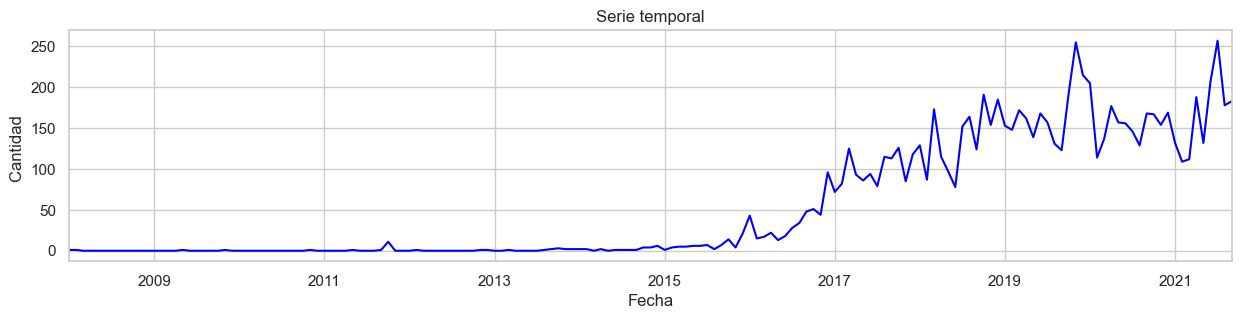

In [167]:
df["date_added"] = pd.to_datetime(df["date_added"])

y = df.set_index("date_added").resample("ME").size()

y.plot(figsize=(15, 3), color="blue")

plt.title("Serie temporal")
plt.xlabel("Fecha")
plt.ylabel("Cantidad ")

plt.show()

El grafico evidencia que el catálogo de Netflix creció con mayor fuerza a partir de 2016, momento que coincide con la expansion masiva de la plataforma, este salto global impulsó un aumento acelerado en la cantidad de títulos para responder a la demanda de nuevos mercados y diversificar la oferta según diferentes culturas e idiomas.

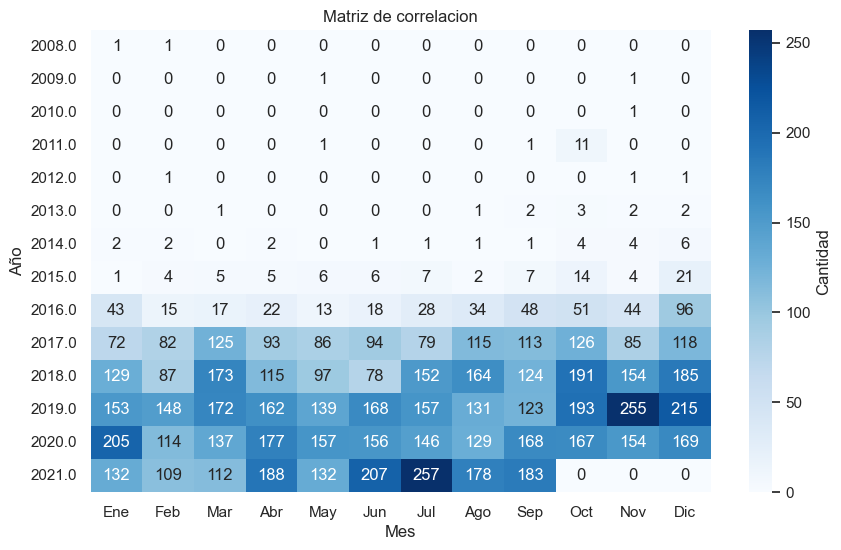

In [67]:
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

pivot_df = df.pivot_table(
        index="year_added",
        columns="month_added",
        values="show_id",   
        aggfunc="count"
        ).fillna(0).astype(int)

pivot_df.columns = ["Ene","Feb","Mar","Abr","May","Jun",
                    "Jul","Ago","Sep","Oct","Nov","Dic"]

plt.figure(figsize=(10,6))

sns.heatmap(pivot_df, annot=True, cmap="Blues", fmt="d", cbar_kws={"label": "Cantidad"})

plt.title("Matriz de correlacion")
plt.xlabel("Mes")
plt.ylabel("Año")

plt.show()

El mapa de calor muestra que los estrenos no se distribuyen de manera uniforme a lo largo del año, pues meses como noviembre y diciembre concentran un mayor número de lanzamientos, lo que refleja una clara estacionalidad vinculada a periodos de alta demanda como vacaciones y fiestas de fin de año

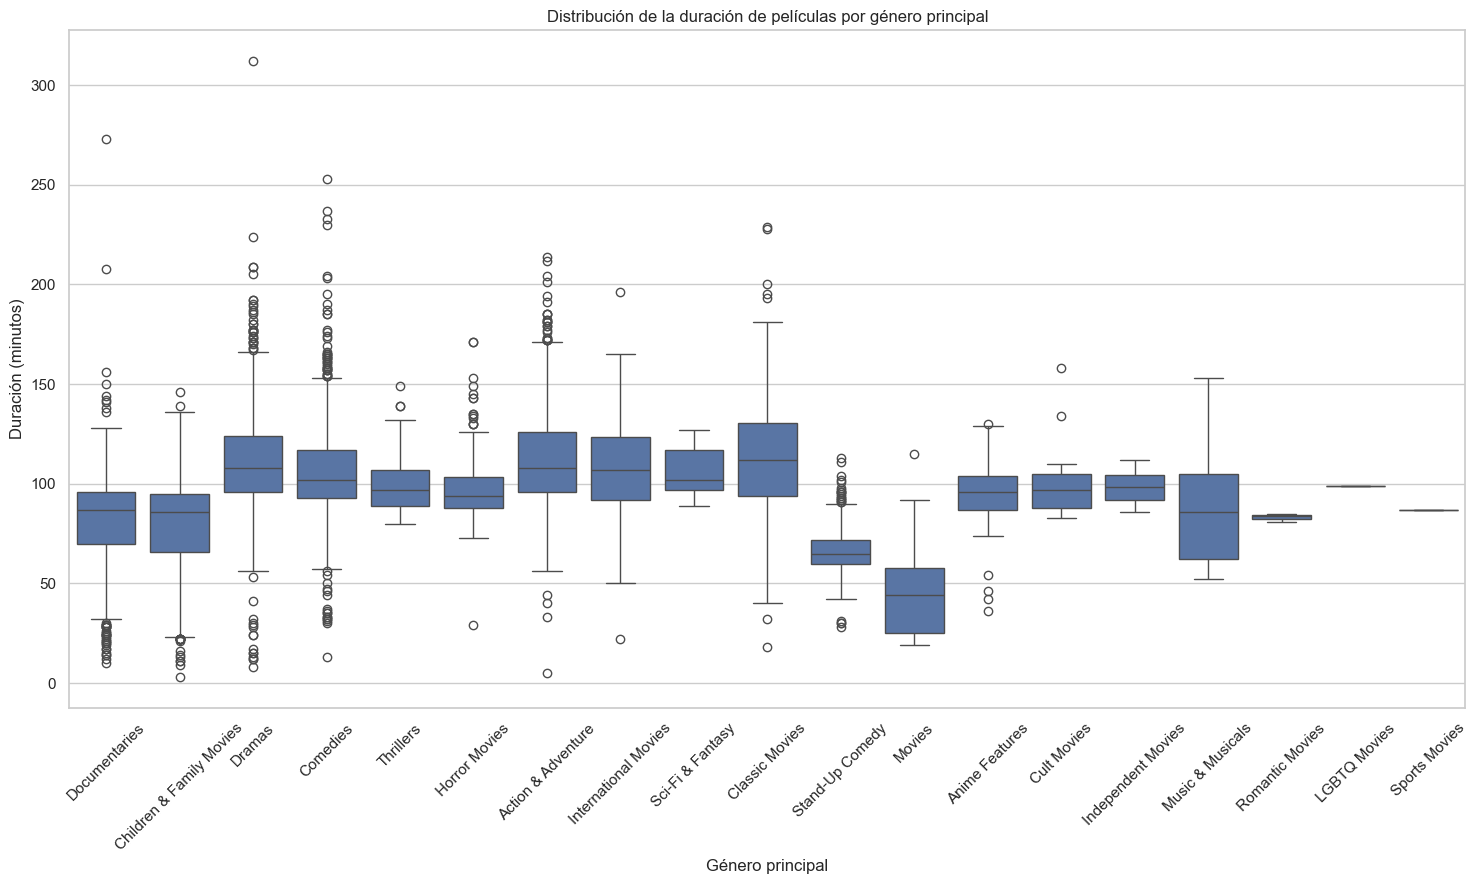

In [166]:
df_movies = df[df["type"] == "Movie"].copy()

df_movies["duration_min"] = df_movies["duration"].str.replace(" min", "", regex=False).astype(float)
df_movies["Pgenero"] = df_movies["listed_in"].str.split(",").str[0].str.strip()


plt.figure(figsize=(15, 9))
sns.boxplot(data=df_movies, x="Pgenero", y="duration_min")

plt.title("Distribución de la duración de películas por género principal")
plt.xlabel("Género principal")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

En general, los géneros que suelen durar más son los documentales, los dramas y las películas clásicas, alcanzando medianas más altas y con algunos títulos que superan ampliamente las 2 o 3 horas. En cambio, géneros como el stand-up comedy, las películas infantiles y el anime presentan duraciones mucho más cortas.
Además, se observa que la variabilidad dentro de un mismo género no es uniforme, mientras los documentales, dramas y comedias muestran una gran dispersión de valores, otros como el anime o las películas románticas son bastante homogéneos en su duración.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



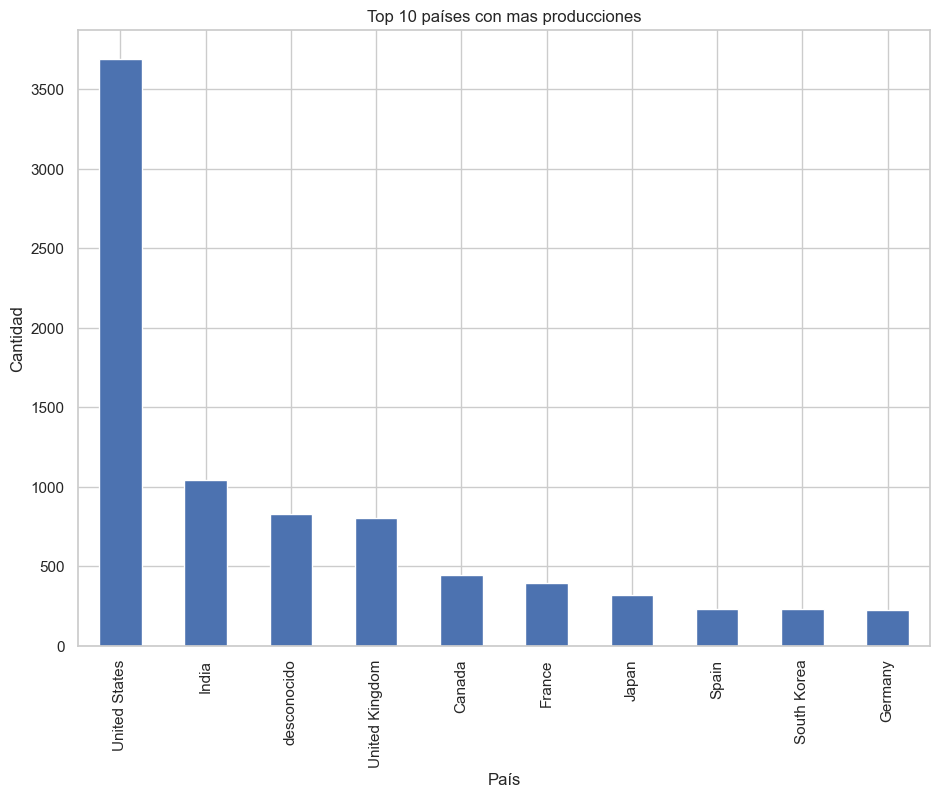

In [ ]:
paises = df["country"].fillna("desconocido").str.split(",")
paises = paises.explode().str.strip()

conteo = paises.value_counts().head(10)

plt.figure(figsize=(11,8))
conteo.plot(kind="bar")

plt.title("Top 10 países con mas producciones")
plt.xlabel("País")
plt.ylabel("Cantidad")

plt.show()

El gráfico muestra que Estados Unidos domina ampliamente el catálogo con una cantidad de producciones muy superior al resto, seguido por India y luego un grupo de países como Reino Unido, Canadá, Francia y Japón, mientras que el resto aporta en menor medida. La distribución no resulta sorprendente, ya que refleja el peso histórico e industrial de Hollywood y Bollywood (Hollywood de la india) en la producción audiovisual mundia.

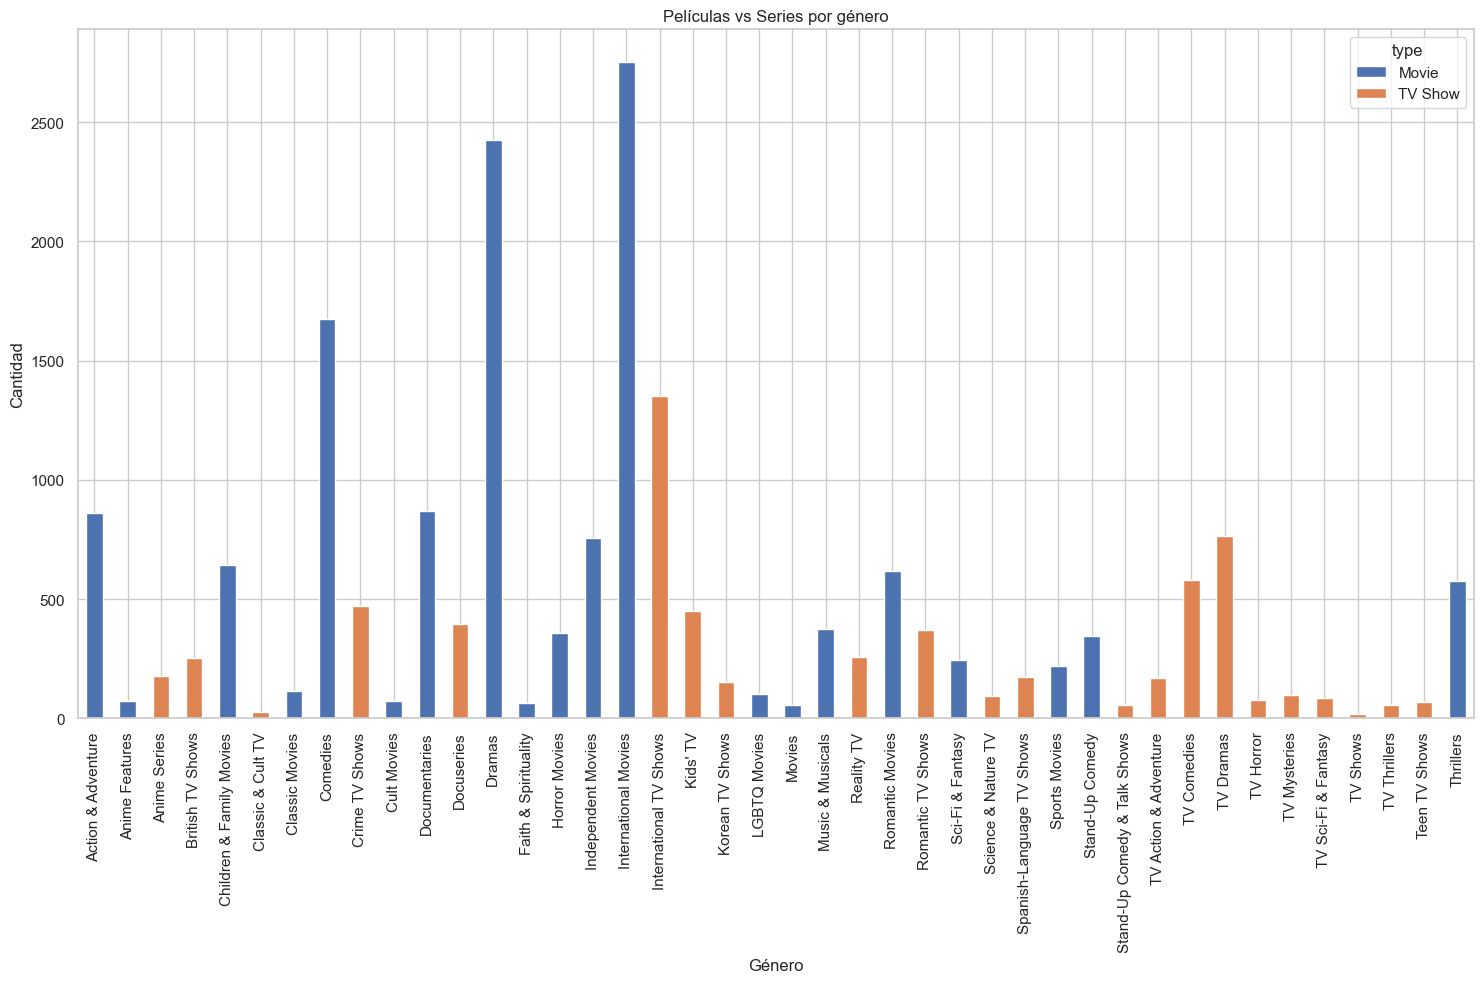

In [122]:
tmp = df.copy()

tmp["listed_in"] = tmp["listed_in"].fillna("desconocido").str.split(',')
tmp = tmp.explode("listed_in")

tmp["genero"] = tmp["listed_in"].str.strip()
conteo = tmp.groupby(["genero", "type"]).size().unstack(fill_value=0)

orden = conteo.sum(axis=1).sort_values(ascending=False)

ax = conteo.plot(kind="bar", stacked=True, figsize=(15,10))

ax.set_title("Películas vs Series por género")
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")

plt.tight_layout()
plt.show()

El analisis evidencia que no existen géneros compartidos entre películas y series dentro del catálogo de Netflix. Los géneros están segmentados de manera explícita, aquellos que incluyen la etiqueta "Movies" corresponden únicamente a películas, mientras que los que llevan la etiqueta "TV" se asocian exclusivamente a series. Esto indica que la clasificación de Netflix no mezcla ambos tipos de contenido en un mismo género, sino que mantiene una separación clara y sistemática entre categorías cinematográficas y televisivas.

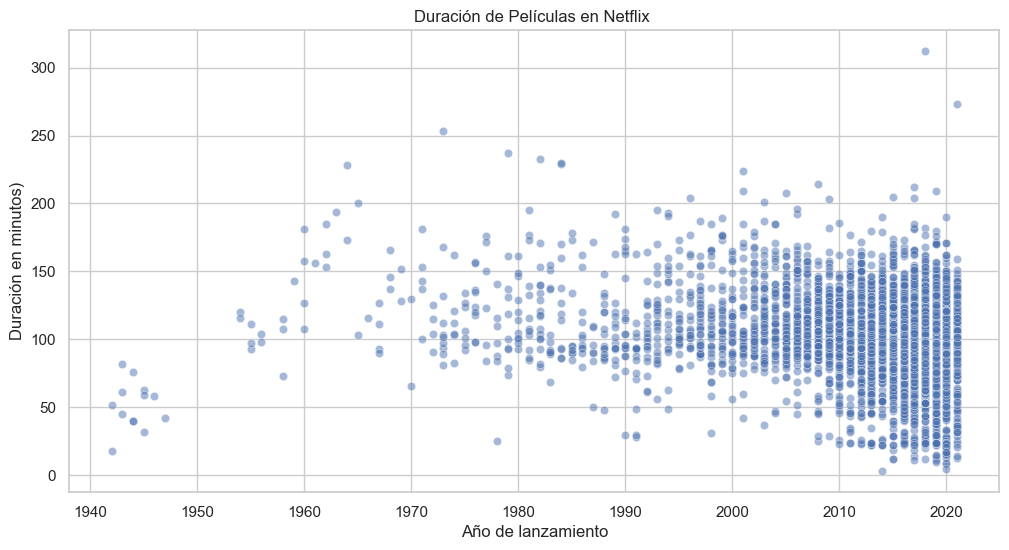

In [132]:
df_movies = df[df["type"] == "Movie"].copy()

df_movies["duration_min"] = df_movies["duration"].str.replace(" min", "", regex=False).astype(float)


plt.figure(figsize=(12,6))
sns.scatterplot(data=df_movies, x="release_year", y="duration_min", alpha=0.5)

plt.title("Duración de Películas en Netflix ")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración en minutos)")
plt.show()

En general, la duración de las películas no ha cambiado mucho con el tiempo, la mayoría sigue estando entre 80 y 120 minutos, aunque en los años más antiguos había más variedad, con cintas muy cortas y otras muy largas. Llaman la atención algunos casos raros, como películas de más de 300 minutos o estrenos recientes que duran menos de media hora.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

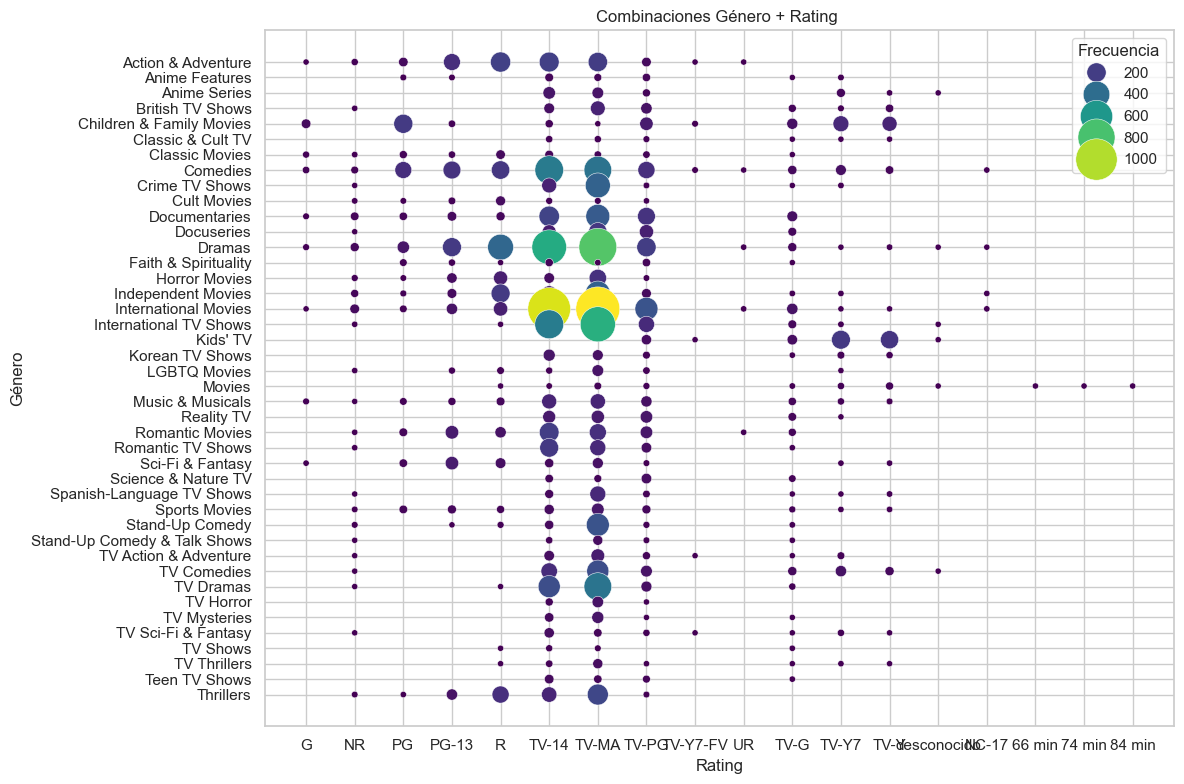

In [168]:
tmp = df.copy()

tmp["genero"] = tmp["listed_in"].fillna("desconocido")
tmp["rating"] = tmp["rating"].fillna("desconocido")

tmp["genero"] = tmp["genero"].str.split(',')
tmp = tmp.explode("genero")

tmp["genero"] = tmp["genero"].str.strip()

conteo = tmp.groupby(["genero", "rating"]).size().reset_index(name='count')

plt.figure(figsize=(12,8))

sns.scatterplot(
    data=conteo,
    x="rating",
    y="genero",
    size="count",
    sizes=(20, 1000),
    hue="count",
    palette="viridis")

plt.title("Combinaciones Género + Rating ")
plt.xlabel("Rating")
plt.ylabel("Género")
plt.legend(title="Frecuencia")

plt.tight_layout()
plt.show()

En el catalogo de Netflix se observa que los géneros más orientados a un público adulto corresponden principalmente a dramas, thrillers, películas de crimen y terror, los cuales suelen estar clasificados con ratings como "TV-MA" o "R".
En contraste, los contenidos dirigidos a un público familiar o infantil se concentran en géneros como Children & Family Movies, Kids’ TV, animación y comedias ligeras, que aparecen con ratings "TV-Y", "TV-G" o "PG", pensados para ser para toda la familia.